#### consensusID

In [222]:
import pyopenms as oms
import matplotlib.pyplot as plt
import numpy as np

In [223]:
new = r"C:\Users\wd\Desktop\new_run\consensusid\01524_A01_P015424_S00_N01_R1_consensus.idXML"
old = r"C:\Users\wd\Desktop\quantms_res\res\consensusid\01524_A01_P015424_S00_N01_R1_consensus.idXML"
new_protein_ids = []
new_peptide_ids = []
old_protein_ids = []
old_peptide_ids = []
oms.IdXMLFile().load(new, new_protein_ids, new_peptide_ids)
oms.IdXMLFile().load(old, old_protein_ids, old_peptide_ids)

In [224]:
print("Without using MS2Respore:" + str(len(old_peptide_ids)))
print("Using MS2Respore:" + str(len(new_peptide_ids)))

Without using MS2Respore:27578
Using MS2Respore:27578


In [225]:
new_scores_all = list()
old_scores_all = list()
new_scores_decoy = list()
new_scores_target = list()
old_scores_decoy = list()
old_scores_target = list()
for peptide_id in new_peptide_ids:
    for hit in peptide_id.getHits():
        new_scores_all.append(hit.getScore())
        if hit.getMetaValue("target_decoy") == "decoy":
            new_scores_decoy.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target":
            new_scores_target.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target+decoyt":
            new_scores_decoy.append(hit.getScore())
            new_scores_target.append(hit.getScore())
for peptide_id in old_peptide_ids:
    for hit in peptide_id.getHits():
        old_scores_all.append(hit.getScore())
        if hit.getMetaValue("target_decoy") == "decoy":
            old_scores_decoy.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target":
            old_scores_target.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target+decoyt":
            old_scores_decoy.append(hit.getScore())
            old_scores_target.append(hit.getScore())

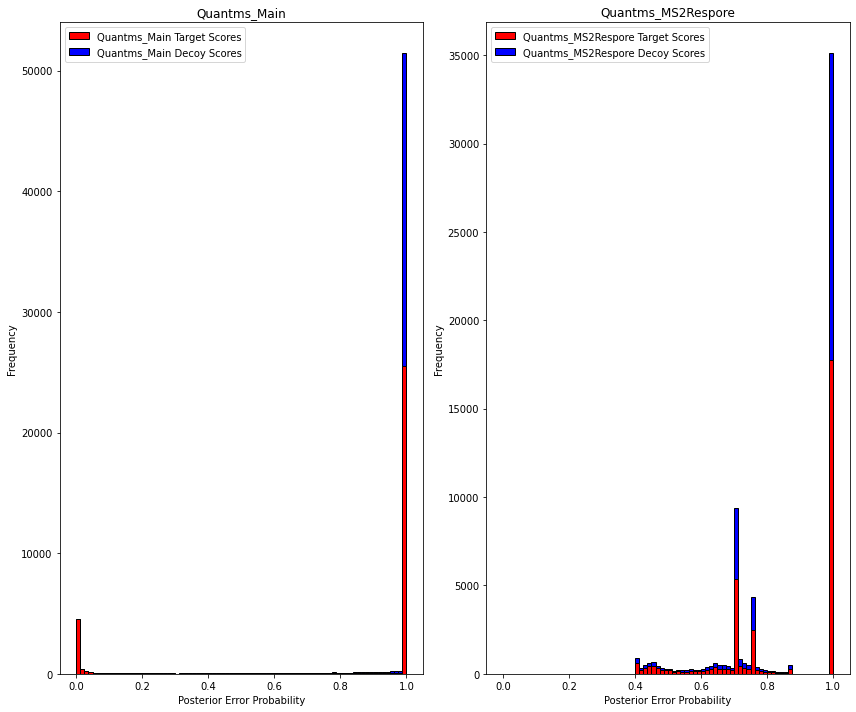

In [226]:
plt.figure(figsize=(12, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.hist([old_scores_target, old_scores_decoy], bins=80, range=(0, 1),
         edgecolor='black', color=['red','blue'], label=['Quantms_Main Target Scores', 'Quantms_Main Decoy Scores'],
         alpha=1, stacked=True)
ax1.set_title('Quantms_Main')
ax1.set_xlabel('Posterior Error Probability')
ax1.set_ylabel('Frequency')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.hist([new_scores_target, new_scores_decoy], bins=80, range=(0, 1),
         edgecolor='black', color=['red','blue'], label=['Quantms_MS2Respore Target Scores', 'Quantms_MS2Respore Decoy Scores'],
         alpha=1, stacked=True)
ax2.set_title('Quantms_MS2Respore')
ax2.set_xlabel('Posterior Error Probability')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

### After FDRCONSENSUSID

In [227]:
new = r"C:\Users\wd\Desktop\new_run\fdrconsensusid\01524_A01_P015424_S00_N01_R1_consensus_fdr.idXML"
old = r"C:\Users\wd\Desktop\quantms_res\res\fdrconsensusid\01524_A01_P015424_S00_N01_R1_consensus_fdr.idXML"
new_protein_ids = []
new_peptide_ids = []
old_protein_ids = []
old_peptide_ids = []
oms.IdXMLFile().load(new, new_protein_ids, new_peptide_ids)
oms.IdXMLFile().load(old, old_protein_ids, old_peptide_ids)

In [228]:
print("Without using MS2Respore:" + str(len(old_peptide_ids)))
print("Using MS2Respore:" + str(len(new_peptide_ids)))

Without using MS2Respore:27578
Using MS2Respore:27578


In [229]:
new_scores_all = list()
old_scores_all = list()
new_scores_decoy = list()
new_scores_target = list()
old_scores_decoy = list()
old_scores_target = list()
for peptide_id in new_peptide_ids:
    for hit in peptide_id.getHits():
        new_scores_all.append(hit.getScore())
        if hit.getMetaValue("target_decoy") == "decoy":
            new_scores_decoy.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target":
            new_scores_target.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target+decoyt":
            new_scores_decoy.append(hit.getScore())
            new_scores_target.append(hit.getScore())
for peptide_id in old_peptide_ids:
    for hit in peptide_id.getHits():
        old_scores_all.append(hit.getScore())
        if hit.getMetaValue("target_decoy") == "decoy":
            old_scores_decoy.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target":
            old_scores_target.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target+decoyt":
            old_scores_decoy.append(hit.getScore())
            old_scores_target.append(hit.getScore())

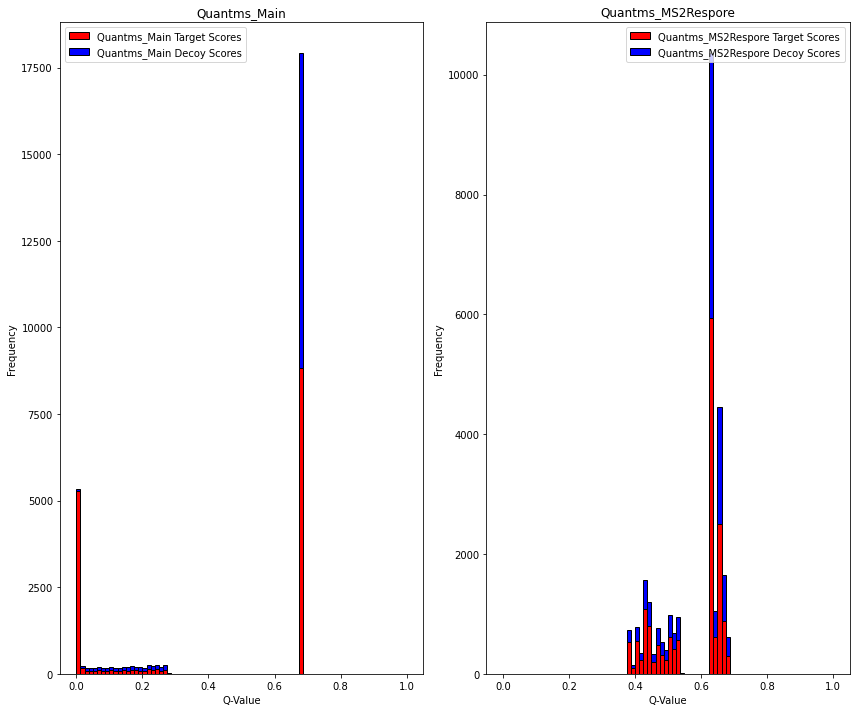

In [230]:
plt.figure(figsize=(12, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.hist([old_scores_target, old_scores_decoy], bins=80, range=(0, 1),
         edgecolor='black', color=['red','blue'], label=['Quantms_Main Target Scores', 'Quantms_Main Decoy Scores'],
         alpha=1, stacked=True)
ax1.set_title('Quantms_Main')
ax1.set_xlabel('Q-Value')
ax1.set_ylabel('Frequency')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.hist([new_scores_target, new_scores_decoy], bins=80, range=(0, 1),
         edgecolor='black', color=['red','blue'], label=['Quantms_MS2Respore Target Scores', 'Quantms_MS2Respore Decoy Scores'],
         alpha=1, stacked=True)
ax2.set_title('Quantms_MS2Respore')
ax2.set_xlabel('Q-Value')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

In [231]:
n = 0
for i in old_scores_all:
    if i < 0.10:
        n+=1
print(n)

6609


In [232]:
n = 0
for i in new_scores_all:
    if i < 0.10:
        n+=1
print(n)

0


### After IDFilter

In [233]:
new = r"C:\Users\wd\Desktop\new_run\idfilter\01524_A01_P015424_S00_N01_R1_consensus_fdr_filter.idXML"
old = r"C:\Users\wd\Desktop\quantms_res\res\idfilter\01524_A01_P015424_S00_N01_R1_consensus_fdr_filter.idXML"
new_protein_ids = []
new_peptide_ids = []
old_protein_ids = []
old_peptide_ids = []
oms.IdXMLFile().load(new, new_protein_ids, new_peptide_ids)
oms.IdXMLFile().load(old, old_protein_ids, old_peptide_ids)

In [234]:
print("Without using MS2Respore:" + str(len(old_peptide_ids)))
print("Using MS2Respore:" + str(len(new_peptide_ids)))

Without using MS2Respore:6609
Using MS2Respore:0


In [235]:
new_scores_all = list()
old_scores_all = list()
new_scores_decoy = list()
new_scores_target = list()
old_scores_decoy = list()
old_scores_target = list()
for peptide_id in new_peptide_ids:
    for hit in peptide_id.getHits():
        new_scores_all.append(hit.getScore())
        if hit.getMetaValue("target_decoy") == "decoy":
            new_scores_decoy.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target":
            new_scores_target.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target+decoyt":
            new_scores_decoy.append(hit.getScore())
            new_scores_target.append(hit.getScore())
for peptide_id in old_peptide_ids:
    for hit in peptide_id.getHits():
        old_scores_all.append(hit.getScore())
        if hit.getMetaValue("target_decoy") == "decoy":
            old_scores_decoy.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target":
            old_scores_target.append(hit.getScore())
        elif hit.getMetaValue("target_decoy") == "target+decoyt":
            old_scores_decoy.append(hit.getScore())
            old_scores_target.append(hit.getScore())

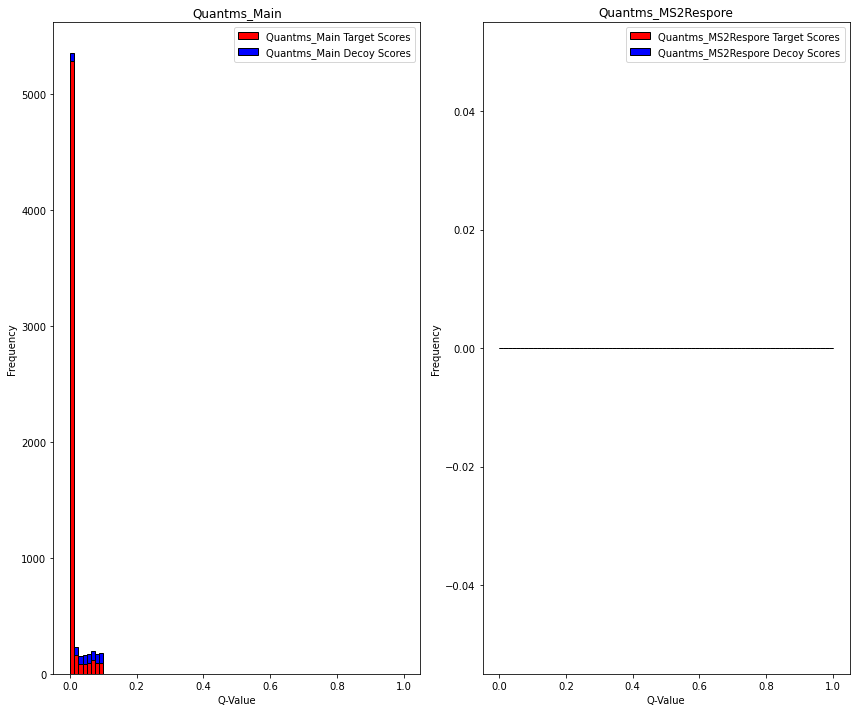

In [236]:
plt.figure(figsize=(12, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.hist([old_scores_target, old_scores_decoy], bins=80, range=(0, 1),
         edgecolor='black', color=['red','blue'], label=['Quantms_Main Target Scores', 'Quantms_Main Decoy Scores'],
         alpha=1, stacked=True)
ax1.set_title('Quantms_Main')
ax1.set_xlabel('Q-Value')
ax1.set_ylabel('Frequency')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.hist([new_scores_target, new_scores_decoy], bins=80, range=(0, 1),
         edgecolor='black', color=['red','blue'], label=['Quantms_MS2Respore Target Scores', 'Quantms_MS2Respore Decoy Scores'],
         alpha=1, stacked=True)
ax2.set_title('Quantms_MS2Respore')
ax2.set_xlabel('Q-Value')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()